![](https://images.unsplash.com/photo-1519162808019-7de1683fa2ad?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3068&q=80)

Data from https://www.kaggle.com/neuromusic/avocado-prices

To get a better picture of what is going, lets look at the following:
* What regions and years are included in the dataset?
* How spread out are avocado prices?

In [3]:
#import useful libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
        
#Read and show data
avocado = pd.read_csv("avocado.csv")
avocado.head()        

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Check for missing data

In [4]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
avocado.year.unique()

array([2015, 2016, 2017, 2018])

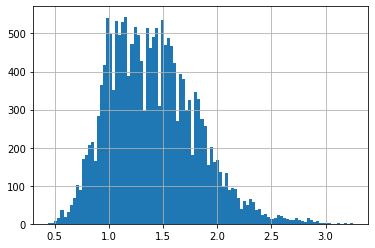

In [7]:
avocado["AveragePrice"].hist(bins=100)

In [8]:
#Average
prices = avocado['AveragePrice']
st.mean(prices)

1.405978409775878

In [9]:
#25th percentile
np.percentile(prices,25)

1.1

In [10]:
#75th percentile
np.percentile(prices,75)

1.66

Looks like most avocado prices 
* range from 1.1 to 1.66 
* with an average price of 1.4 
* across all cities shown above 
* from 2015 to 2018

Interesting, I wonder how this general pricing compares to my city San Diego.

In [11]:
sd = avocado.loc[avocado['region'] == 'SanDiego']
sdprices = sd['AveragePrice']
np.mean(sdprices)

1.3981656804733738

To my suprise, the average price in San Diego is cheaper than the average of all markets. Lets see how all regions compare.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


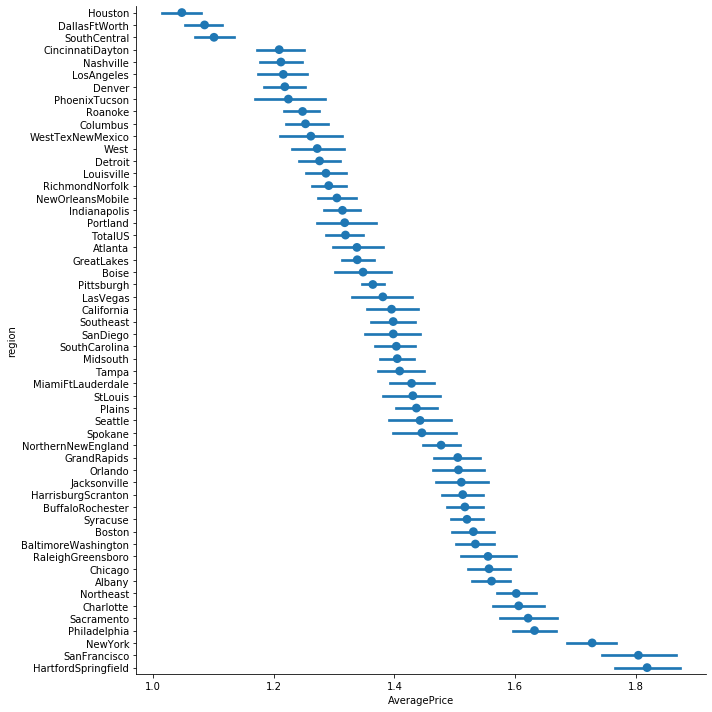

In [12]:
#Ordering graph by region & average price
order = (
    avocado.groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)
#Graph comparing all regions with their mean/IQR prices
graph = sns.factorplot('AveragePrice','region', data=avocado,
                       size=10,
                       order=order,
                      join=False,)

Looks like the most expensive regions for avocados across all years are:
* San Francisco
* Hartford Springfield
* New York

Least expensive:
* South Central
* Houston
* Dallas Forth Worth

Now lets focus on the following:
* How do avocado prices changed over a year
* Is there season variability in prices
* How do organic vs conventional avocados vary in prices

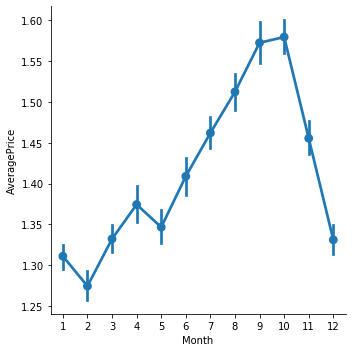

In [13]:
#Converting date values into usable pandas type
avocado['Date'] = pd.to_datetime(avocado['Date'])
#Setting month values
avocado['Month'] = avocado['Date'].dt.month

graph2 = sns.factorplot('Month','AveragePrice', data=avocado)

Looks like there is  season variablity in prices, dropping once winter starts and increasing once spring comes around.  

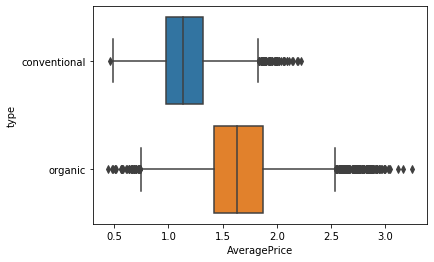

In [14]:
#Whisker Box Plot
sns.boxplot(y='type', x='AveragePrice', data=avocado)

Unsurprisingly, organic avocado prices tend to be much higher but also vary much more (wider end points and box) than conventional prices.